In [1]:
from keras.applications import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions
import numpy as np

In [2]:
model = Xception(weights = 'imagenet')

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 29s 0us/step


In [4]:
img = image.load_img('images/n0/n0018.jpg', target_size = (299, 299))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)

In [5]:
pred = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [7]:
decode_predictions(pred, top=3)[0]

[('n02492660', 'howler_monkey', 0.94408566),
 ('n02493509', 'titi', 0.014543152),
 ('n02493793', 'spider_monkey', 0.0057394323)]

In [8]:
from keras.models import Model

base_model = Xception(weights='imagenet', include_top = False)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 43s 1us/step


In [9]:
model = Model(inputs = base_model.input, outputs = base_model.output)

In [10]:
features = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [11]:
features.shape

(1, 10, 10, 2048)

In [12]:
encoder_output = base_model.output

In [13]:
from keras.layers import Conv2D, UpSampling2D

decoder_output = Conv2D(1, (1, 1), activation='sigmoid')(encoder_output)
decoder_output = UpSampling2D(size=(32, 32))(decoder_output)

In [14]:
model = Model(inputs=base_model.input, outputs=decoder_output)

In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [16]:
segmentation_result = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [18]:
segmentation_result = np.random.rand(1, 10, 10, 1)

In [19]:
thresholded_result = (segmentation_result > 0.5).astype(np.uint8)

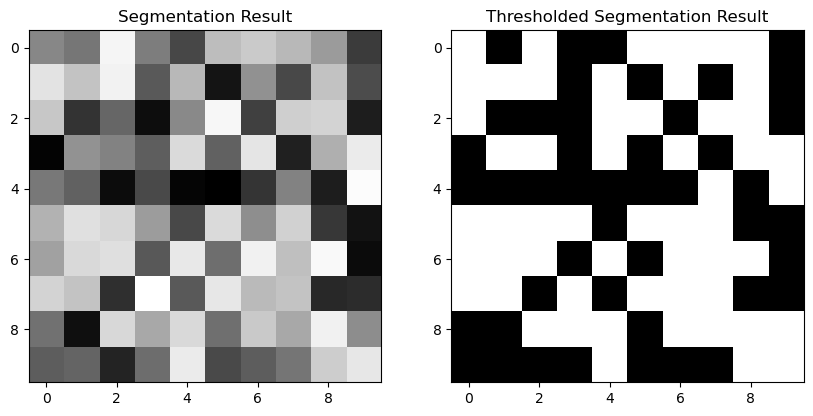

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(segmentation_result[0, :, :, 0], cmap='gray')
plt.title('Segmentation Result')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_result[0, :, :, 0], cmap='gray')
plt.title('Thresholded Segmentation Result')

plt.show()